In [6]:
import numpy as np
import cv2 as cv
from matplotlib import mlab 
from matplotlib import pyplot as plt
import random
import sys
import os
from scipy import stats

In [3]:
def crop_images(all_pics):
    cropped_files = []
    for file_img in all_pics:
        path_name = "raw_data/" 
        img_get = cv.imread(path_name + file_img)
        img_cropped = img_get[230:600,1100:1600]
        plt.imshow(img_cropped)
        plt.show()
        
        
        
        new_file = "cropped_data/C_" + file_img 
        
        print(new_file)
    
        r = cv.imwrite(new_file, img_cropped)
        print (r)
        cropped_files.append(new_file)
        
    return cropped_files




In [4]:
## try just look for black pixels1!!
## select random samples
#cropped = img[230:600,1100:1600]


def mask_panel(cropped):
    mask = np.zeros(cropped.shape, dtype=np.uint8)
    ## these are the dimensions for the shape
    roi_corners = np.array([[(90,41), (23,328), (458,283),(366,5)]], dtype=np.int32)

    # fill the ROI so it doesn't get wiped out when the mask is applied
    channel_count = cropped.shape[2]  
    ignore_mask_color = (255,)*channel_count
    cv.fillPoly(mask, roi_corners, ignore_mask_color)
    # from Masterfool: use cv2.fillConvexPoly if you know it's convex

    # apply the mask
    masked_image = cv.bitwise_and(cropped, mask)
    #plt.imshow(masked_image)
    #plt.show()
    return masked_image





## monte carlo sampling

# ratio of black pixels and white gives snow coverage

## possibly remove purple shade

In [7]:

def ranSelect(x,y):
    # x, y are dimensions of the image
    x_selected = random.randint(0,x)
    y_selected = random.randint(0,y)
    #print(x_selected, y_selected)
    return (x_selected, y_selected)



In [5]:
## automate getting BGR color values from panel, do 1000 vs 10,000iterations 
## to find ratio of non zero (higher than 100 for each color) vs near zero
## eliminate exactly zero values

def classify(col_arr):
    if sum(col_arr) > 300:
        return 1 # snow
    elif sum(col_arr) == 0:
        return -1 # masked, don't consider
    else:
        return 0 # no snow

def compute_ratio(img, n = 1000):
    x, y = img.shape[0], img.shape[1]
    
    snow = 0
    no_snow = 0
    
    
    for i in range(n):
        s_x, s_y = ranSelect(x-1,y-1)
        color = img[s_x, s_y]
        # print(color)
#         for j in range(3):
            
#             color.append(int(img[s_x, s_y][j]))
#             print("color arr: ", color)
        classified = classify(color)
        if classified == 1:
            snow+=1
        elif classified == 0:
            no_snow+=1        
    
    ## ratio is num of 1/ num of 0
    
    if no_snow == 0 :
        return snow

    return snow/no_snow

# compute_ratio(img)
    

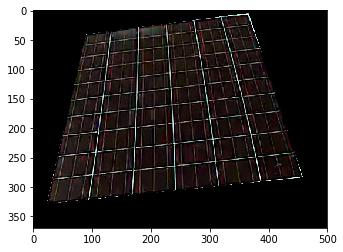

True

In [10]:
## This is to get an example cropped image

raw_image = cv.imread("sample-img.jpg")

cropped_image= raw_image[230:600,1100:1600]
masked_image = mask_panel(cropped_image)

plt.imshow(masked_image)
plt.show()

plot_name = "sample-cropped.jpg"
#plt.savefig(plot_name)
cv.imwrite(plot_name, masked_image) 


In [6]:
## for snow covered: ratio is around  500 - 530
## for no snow covered: ratio is about 0.05 - 0.07
##



def compute_all_old():
    # get all images from raw_no_snow and raw_snow
    raw_foldrs = ["raw_no_snow/", "raw_snow/"]
    # croped_foldrs = ["cropped_no_snow/", "cropped_snow/"]    
    
    for foldr in raw_foldrs:
        raw_images = []
        ratios = []
        # read in raw_images
        for filename in os.listdir(foldr):
            
            img = cv.imread(os.path.join(foldr,filename))
            if img is not None:
                raw_images.append(img) 
                
        # crop and mask, optionally save to cropped_no_snow and cropped_snow
        for raw_image in raw_images:
            cropped_image= raw_image[230:600,1100:1600]
            masked_image = mask_panel(cropped_image)
    
            # compute ratio for each image for each category
            r = compute_ratio(masked_image)
            ratios.append(r)
            if r > 0.5 and foldr == "raw_no_snow/" or r < 3 and foldr == "raw_snow/":
                # these are the anomalies as it has no snow but greater ratio > 0.5
                # or have snow but a rather small ratio
                print(r)
                plt.imshow(masked_image)
                plt.show()
           
            
    
            
        
        # plot all the ratios
        plt.plot(ratios)
        label = str("ratios from " + foldr)
        plt.ylabel(label)
        plt.show()
        #plt.savefig(str(label + ".png"))
        


# a = compute_all_old()     

# compare with before and after, spatial - temporal ( to get rid of purple and glare)
# keep track of previous classification and then look for abrupt change

# resampling

# partial covered as category, refined
    
    
# get pixels around the chosen one

# ROC false positive balance, use the curve to find parameters

mean and standard deviation: 81.60549406140532 44.55363248027424
95% confidence interval: (80.62281499605511, 82.58817312675554)


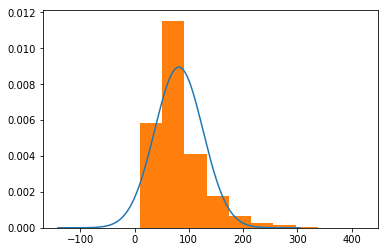

mean and standard deviation: 0.0017721518987341774 0.011557176922038817
95% confidence interval: (-0.9809069134514711, 0.9844512172489394)


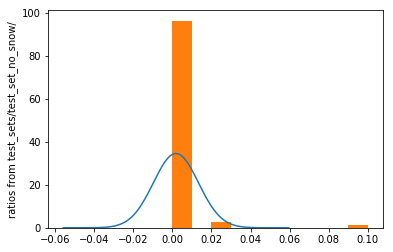

mean and standard deviation: 444.3031117670755 89.48682274174867
95% confidence interval: (439.0066372071089, 449.5995863270421)


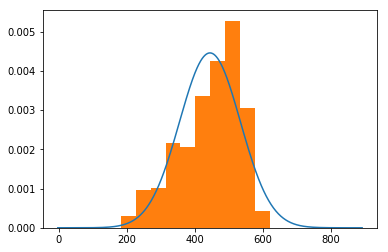

mean and standard deviation: 0.9145454545454544 0.10281171107361406
95% confidence interval: (-4.381929105421138, 6.211020014512046)


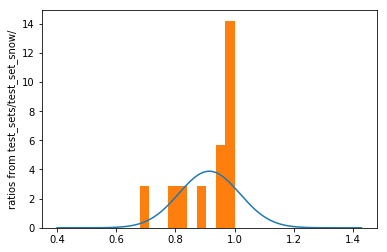

In [8]:
## This section deals with the bad images (red or other colors)

# process masked images (not 0,0,0) to see if has high values of R and B but not G -> purple

# at the time of selecting 100 neighborhoods, look at each and find red ones. If found > k purple pixels -> too many!!

# enter the unknown zone, stop and flag as inconclusive

def is_purple(rgb):
    list_of_known_purples = [(221,160,221), (238,130,238), (218,112,214), (255,0,255), (186,85,211),\
                             (147,112,219), (138,43,226), (148,0,211), (153,50,204), (139,0,139), (128,0,128), (75,0,130)]

    for color in list_of_known_purples:
        
        if rgb[0] in range(color[0]-10, color[0] + 10) and rgb[1] in range(color[1]-10, color[1] + 10)and \
        rgb[2] in range(color[2]-10, color[2] + 10) :
            return True
    return False
    



def classify_sum(arr, avg_snow = 300):
    # at this point, we have removed the top R portion of sum_col array
    # we are given an array like [145, 120, 100, 49, 29, 26, 9] (no snow but has line/color) 
    # or [563, 563, 563, 562, 30] (partially snow)
    
    # we return 0: no snow, 1 : snow for the current array!
    
    ### TODO: Maybe for this classify sum I can look based on porportion of white in nbd!!
    
    if np.mean(arr) < avg_snow:
        return 0
    else:
        return 1   
    
# cnt_list[0] is num of purple pixels so far in this whole image
def compute_ratio_nbd(img, sum_col_arr,cnt_list, n = 100, r = 12, R = 0.10, max_purple_pixel = 100):
    # r is radius, R is proportion of nbds to ignore
    x, y = img.shape[0], img.shape[1]
    
    snow = 0
    no_snow = 0

    
    while n > 0:
        s_x, s_y = ranSelect(x-1,y-1)
        if s_x < r or s_y < r or s_x > x -1 - r or s_y > y - 1 - r:
            continue # resample if near edges
        
        color = img[s_x, s_y]
        
        # resample if we picked a point that's masked region
        if sum(color) == 0:
            continue
      
        nbd_img = img[s_x-r: s_x+r, s_y-r: s_y+r]
        
        colors = []
        sum_col = []
        
        for i in range(2*r):
            for j in range(2*r):
#                 if is_purple(nbd_img[i,j]):
#                     cnt_list[0] +=1
#                 if cnt_list[0] > max_purple_pixel:
#                     return -1
                    
                colors.append([nbd_img[i,j][0], nbd_img[i,j][1], nbd_img[i,j][2]])
                sum_col.append(sum(nbd_img[i,j]))
                
    
        # drop top R % of highest sums
        sum_col.sort(reverse= True)
        
        while len(sum_col) > 0 and sum_col[-1] == 0:
            
            # remove the all zero elements
            sum_col.pop(len(sum_col)-1)
        
        # if there is a huge difference between max and min   
        # then remove top R percent from what is left in sum_col
        
        remove_top = int(len(sum_col)/(1/R))
        sum_col = sum_col[remove_top:]
        
        # append this to all_sum_col, plot hist for all imgs
        new_sum_col = np.mean(sum_col)
        
        
        sum_col_arr.append(new_sum_col)
        
       
        classified = classify_sum(new_sum_col)
                      
        
        if classified == 1:
            snow+=1
            n -= 1
        elif classified == 0:
            
#             plt.imshow(nbd_img)
#             plt.show()
            no_snow+=1 
            n -= 1 
    ## ratio is num of 1/ num of 0
    
    if no_snow == 0 :
        return 1

    return snow/(snow+ no_snow)


def compute_all():
    # get all images from raw_no_snow and raw_snow
    #raw_foldrs = ["raw_no_snow/"]
    #raw_foldrs = ["test_raw_no_snow/", "test_raw_snow/"]
    raw_foldrs = ["test_sets/test_set_no_snow/", "test_sets/test_set_snow/"]
    
    max_purple = 300
      
    
    for foldr in raw_foldrs:
        
        
        total_purple = []
        
        
        raw_images = []
        ratios = []
        col_sum_arr = []
        # read in raw_images
        for filename in os.listdir(foldr):
            
            img = cv.imread(os.path.join(foldr,filename))
            if img is not None:
                raw_images.append(img) 
                
        # crop and mask, optionally save to cropped_no_snow and cropped_snow
        for raw_image in raw_images:
            cnt_list = [0]
            
            cropped_image= raw_image[230:600,1100:1600]
            masked_image = mask_panel(cropped_image)
    
            # compute ratio for each image for each category
            r = compute_ratio_nbd(masked_image, col_sum_arr, cnt_list)
            
                
            #total_purple.append(cnt_list[0])
            ratios.append(r)
            
#             print(r)
#             plt.imshow(masked_image)
#             plt.show()
           
            
        
        
        mu =  np.mean(col_sum_arr)
        sigma = np.std(col_sum_arr)
        print("mean and standard deviation:",mu, sigma)
        confit = stats.t.interval(0.95, len(col_sum_arr)-1, loc=mu, scale=stats.sem(col_sum_arr))
        print("95% confidence interval:", confit)
        
#         import pandas as pd
#         pd.Series(col_sum_arr).plot.density()
#         return
        x = np.linspace(mu - 5*sigma, mu + 5*sigma, 1000)
        plt.plot(x,stats.norm.pdf(x, mu, sigma))
        plt.hist(col_sum_arr, density=True)
        plt.show()
        
            
        
        # plot all the ratios
        mu = np.mean(ratios)
        sigma = np.std(ratios)
        print("mean and standard deviation:",mu, sigma)
        confit = stats.t.interval(0.95, len(col_sum_arr)-1, loc=mu, scale=stats.sem(col_sum_arr))
        print("95% confidence interval:", confit)
        x = np.linspace(mu - 5*sigma, mu + 5*sigma, 1000)
        plt.plot(x,stats.norm.pdf(x, mu, sigma))
        plt.hist(ratios, density=True)
        label = str("ratios from " + foldr)
        plt.ylabel(label)
    
        plt.show()
        
        # plot the purple pixels
#         plt.plot(total_purple)
#         plt.show()

compute_all()




# histogram for actual colors (no snow & snow)
# histogram for red

# small false negative

# 1) two threadhold : confiden snow, no snow, not sure -> turns out one threshold is good 

# 2) st/ var as feature of pixel values -> not really accurate if white lines or patial snow

# 3) temporal : no snow to snow right away  -> problem: those that are red tend to have multiple in a row

# once we have ratio: percentages of snow covered, category: heavily covered, some covered

## power values!!

## CSV voltage: col:1 time, col E : power



In [8]:
### TESTING DEBUG CODES####


### here are some code to test the cropping of nbd
# also still trying to see if we can detect the colored (red/purple)
# no_snow images have pattern?

files = ['test_raw_no_snow/2019-01-26_14-49-46_800-Copy1.jpg', 
         'test_raw_no_snow/2019-01-26_14-59-46_933-Copy1.jpg','test_raw_snow/2019-01-27_07-40-00_484-Copy1.jpg',
         'test_raw_snow/2019-01-27_07-30-00_366-Copy1.jpg']

def test(filename):

    img=cv.imread(filename)


    cropped_image= img[230:600,1100:1600]
    masked_image = mask_panel(cropped_image)

    # img = masked_image[40:60, 80:100] # edge of masked and panel
    # img = masked_image[90:110, 90:110] # has cross line on panel
    img = masked_image[200:220, 200:220] # has line on panel, but not much
    plt.imshow(img)
    plt.show()

    colors = []
    sum_col = []
    for i in range(0,20):
        for j in range(0,20):
            colors.append([img[i,j][0], img[i,j][1], img[i,j][2]])
            sum_col.append(sum(img[i,j]))
            #print(img[i,j])
    print(colors)
    
    # drop top 10 % of highest sums
    sum_col.sort(reverse= True)
    remove_top = len(sum_col)//10
    new_sum_col = sum_col[remove_top:]
    # print(sum_col)
    
    print(max(colors,key=lambda x: x[0])[0], min(colors,key=lambda x: x[0])[0])
    # print(max(colors,key=lambda x: x[1])[1], min(colors,key=lambda x: x[1])[1])
    # print(max(colors,key=lambda x: x[2])[2], min(colors,key=lambda x: x[2])[2])
    print(max(sum_col), min(sum_col))
    print(max(new_sum_col), min(new_sum_col))
    
    # this shows the image with no snow but white lines has a lot of inconsistency in a nbd
    # whereas in pic with snow, very consistent colors



# for file in files:
#     test(file)

            


# cropped = img[230:600,1100:1600] # this is a cropped rectangle containing the middle panel
# plt.imshow(cropped)
# plt.show()


#img=cv.imread('cropped_data/C_2019-01-26_14-19-46_463.jpg')
#img = mask_panel(img)


#x, y = ranSelect(img.shape[0], img.shape[1])

# color = []
# for i in range(3):
#     color.append(int(img[200, 200][i]))

# print(color)
# print(img.shape[0], img.shape[1])
# print(x,y)
# print(img[200, 200])

In [9]:

# major steps to classification

# already counted 1000 pixels and none purple, ok! 

# too many pixels purple -> inconclusive
# ratio 0 -> 0.1, no snow with high confidence

# ratio 0.6 -> 1 partial to full snow with high confidence

# rest, look at before and after

# run the full on snow/ no snow and red images in test set: no snow, snow, inconclusive
# plot the prediction errors

# for the snow classified as no snow : false negative rate
# for no snow classified as snow : false positive rate



[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

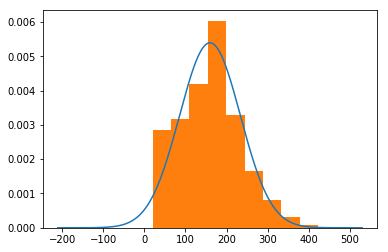

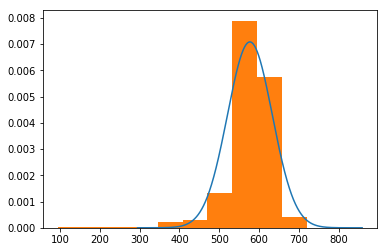

Percentiles: 331.914671, 445.581063, 388.747867
Percentiles: 281.472628, 483.969784, 382.721206
Percentiles: 254.582161, 504.434669, 379.508415
Percentiles: 236.439291, 518.242229, 377.340760
[(0, 0, 0), (0, 0, 2), (0, 0, 0), (0, 0, 0)]
running get_thres_one


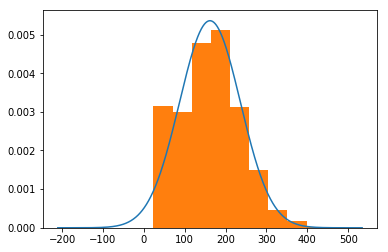

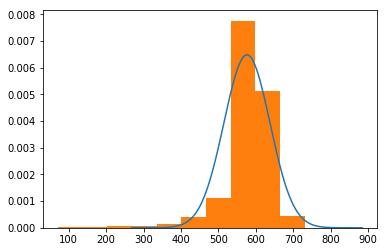

Percentiles: 335.044956, 432.948573, 383.996765
Percentiles: 284.296484, 474.893026, 379.594755
Percentiles: 257.242661, 497.253459, 377.248060
Percentiles: 238.989575, 512.339937, 375.664756
[(0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0)]
running get_thres_one


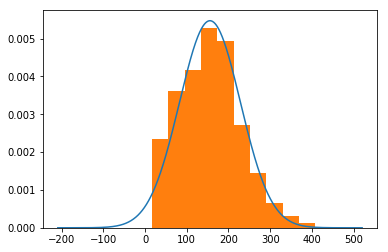

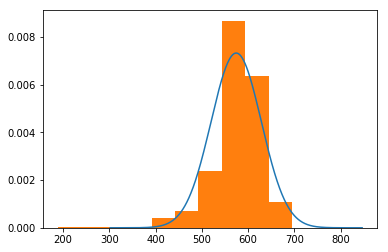

Percentiles: 325.292083, 447.532012, 386.412047
Percentiles: 275.591117, 484.625163, 380.108140
Percentiles: 249.095716, 504.399385, 376.747550
Percentiles: 231.219395, 517.740958, 374.480177
[(0, 0, 1), (0, 0, 0), (0, 0, 1), (0, 0, 0)]
running get_thres_one


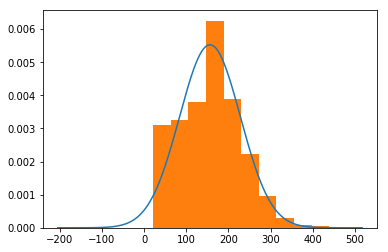

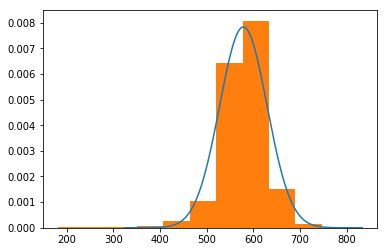

Percentiles: 324.164529, 459.979670, 392.072100
Percentiles: 274.978960, 494.711346, 384.845153
Percentiles: 248.758315, 513.226674, 380.992495
Percentiles: 231.067370, 525.718878, 378.393124
[(0, 0, 1), (0, 0, 1), (0, 0, 3), (0, 0, 2)]
running get_thres_one


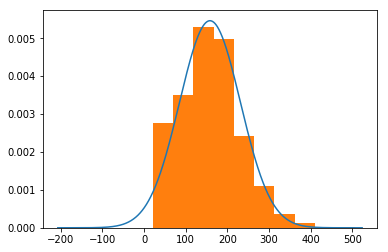

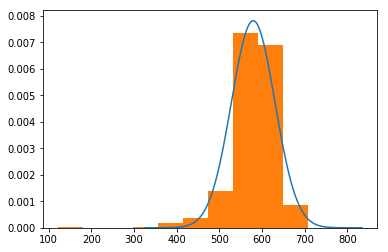

Percentiles: 328.021492, 460.578909, 394.300200
Percentiles: 278.233850, 495.394798, 386.814324
Percentiles: 251.692243, 513.955020, 382.823631
Percentiles: 233.784747, 526.477513, 380.131130
[(0, 0, 3), (0, 0, 3), (0, 0, 3), (0, 0, 2)]


In [9]:
def sample_k_foldrs(labels, k=5):
    print(labels)
    from sklearn.model_selection import StratifiedKFold
    
    y = labels
    X = y
    
    skf = StratifiedKFold(n_splits=k, random_state=None, shuffle=True)
    result = skf.split(X, y)
    to_return = []
    for train_index, test_index in result:
        # print("TRAIN:", train_index, "TEST:", test_index)
        to_return.append([train_index, test_index])
#         X_train, X_test = X[train_index], X[test_index]
#         y_train, y_test = y[train_index], y[test_index]

    return to_return


def get_thres_one(imgs, labels, train_set, params_each):
    print("running get_thres_one")

    
    r = 12
    R = 0.10

    # snow and no snow: get 2 lists of sums, use params to return list of thres one

    list_no_snow = []
    list_snow =[]

    for ind in train_set: 
        n = 10
        
        img = imgs[ind]

        # r is radius, R is proportion of nbds to ignore
        x, y = img.shape[0], img.shape[1]

    
        while n > 0:
            
            
            s_x, s_y = ranSelect(x-1,y-1)
            if s_x < r or s_y < r or s_x > x -1 - r or s_y > y - 1 - r:
                continue # resample if near edges
        
            color = img[s_x, s_y]
        
            # resample if we picked a point that's masked region
            if sum(color) == 0:
                continue
      
            nbd_img = img[s_x-r: s_x+r, s_y-r: s_y+r]
        
            colors = []
            sum_col = []
        
            for i in range(2*r):
                for j in range(2*r):
                    
                 
                    colors.append([nbd_img[i,j][0], nbd_img[i,j][1], nbd_img[i,j][2]])
                    sum_col.append(sum(nbd_img[i,j]))
    
            # drop top R % of highest sums
            sum_col.sort(reverse= True)
        
            while len(sum_col) > 0 and sum_col[-1] == 0:
                
            
                # remove the all zero elements
                sum_col.pop(len(sum_col)-1)
             
        
            # if there is a huge difference between max and min   
            # then remove top R percent from what is left in sum_col
        
            remove_top = int(len(sum_col)/(1/R))
            sum_col = sum_col[remove_top:]
            
        
            # append this to all_sum_col, plot hist for all imgs
            new_sum_col = np.mean(sum_col)
            if new_sum_col != 0:
                
                n -= 1
        
                if labels[ind] == 0:
                    # no snow
                    list_no_snow.append(new_sum_col)
                elif labels[ind] == 1:
                    
                    
                    list_snow.append(new_sum_col)
                    

    mu_no_snow =  np.mean(list_no_snow)
    sigma_no_snow = np.std(list_no_snow)
    
    
    
    mu_snow =  np.mean(list_snow)
    sigma_snow = np.std(list_snow)

    x = np.linspace(mu_no_snow - 5*sigma_no_snow, mu_no_snow + 5*sigma_no_snow, 1000)
    plt.plot(x,stats.norm.pdf(x, mu_no_snow, sigma_no_snow))
    plt.hist(list_no_snow, density=True)
    plt.show()
        
    x = np.linspace(mu_snow - 5*sigma_snow, mu_snow + 5*sigma_snow, 1000)
    plt.plot(x,stats.norm.pdf(x, mu_snow, sigma_snow))
    plt.hist(list_snow, density=True)
    plt.show()

    thres1 = []

    # now we have the 2 arrays, test the params
    for param in params_each:

        
        percentiles_lower = stats.norm.ppf(param, loc=mu_no_snow, scale=sigma_no_snow)
        percentages_upper = stats.norm.ppf(1-param, loc=mu_snow, scale=sigma_snow)

        thres = np.mean((percentiles_lower, percentages_upper))
        thres1.append(thres)
        print("Percentiles: %f, %f, %f" %(percentiles_lower,percentages_upper,thres))
        


    return thres1 # list of thres for each param



def compute_ratio_nbd_with_thres(img, thres1, n = 100, r = 12, R = 0.10):
    # r is radius, R is proportion of nbds to ignore
    x, y = img.shape[0], img.shape[1]
    snow = 0
    no_snow = 0

    
    while n > 0:
        s_x, s_y = ranSelect(x-1,y-1)
        if s_x < r or s_y < r or s_x > x -1 - r or s_y > y - 1 - r:
            continue # resample if near edges
        
        color = img[s_x, s_y]
        
        # resample if we picked a point that's masked region
        if sum(color) == 0:
            continue
      
        nbd_img = img[s_x-r: s_x+r, s_y-r: s_y+r]
        
        colors = []
        sum_col = []
        
        for i in range(2*r):
            for j in range(2*r):
    
                colors.append([nbd_img[i,j][0], nbd_img[i,j][1], nbd_img[i,j][2]])
                sum_col.append(sum(nbd_img[i,j]))
                
    
        # drop top R % of highest sums
        sum_col.sort(reverse= True)
        
        while len(sum_col) > 0 and sum_col[-1] == 0:
            
            # remove the all zero elements
            sum_col.pop(len(sum_col)-1)
        
        # if there is a huge difference between max and min   
        # then remove top R percent from what is left in sum_col
        
        remove_top = int(len(sum_col)/(1/R))
        sum_col = sum_col[remove_top:]
        
        # append this to all_sum_col, plot hist for all imgs
        new_sum_col = np.mean(sum_col)


        n -= 1
        
        if new_sum_col >= thres1:
            
            snow+=1
        else:
            no_snow+=1 
            
                      
    ## ratio is num of 1/ num of 0
    
    if no_snow == 0 :
        return 1

    return snow/(snow+ no_snow)



def compute_ratio_array(img_array, label_array, train_set, thres1):
    ratio_array = []
    
    
    for each_thres in thres1:
        ratio_array_no_snow = []
        ratio_array_snow = []
        for ind in train_set :
            img = img_array[ind]
            ratio= compute_ratio_nbd_with_thres(img, each_thres)
            if label_array[ind] == 0:
                ratio_array_no_snow.append(ratio)
            elif label_array[ind] == 1:
                ratio_array_snow.append(ratio)
                
        ratio_array.append([ratio_array_no_snow , ratio_array_snow])
    print(ratio_array)
    return ratio_array


def get_thres_two( ratio_array, params_each):
    thres2 = []
    for each_thres1_ratio_array in ratio_array:
        mu_no_snow =  np.mean(each_thres1_ratio_array[0])
        sigma_no_snow = np.std(each_thres1_ratio_array[0])
    
        mu_snow =  np.mean(each_thres1_ratio_array[1])
        sigma_snow = np.std(each_thres1_ratio_array[1])

        x = np.linspace(mu_no_snow - 5*sigma_no_snow, mu_no_snow + 5*sigma_no_snow, 1000)
        plt.plot(x,stats.norm.pdf(x, mu_no_snow, sigma_no_snow))
        plt.hist(each_thres1_ratio_array[0], density=True)
        plt.show()
            
        x = np.linspace(mu_snow - 5*sigma_snow, mu_snow + 5*sigma_snow, 1000)
        plt.plot(x,stats.norm.pdf(x, mu_snow, sigma_snow))
        plt.hist(each_thres1_ratio_array[1], density=True)
        plt.show()
        
        for param in params_each:
    
            
            percentiles_lower = stats.norm.ppf(param, loc=mu_no_snow, scale=sigma_no_snow)
            percentages_upper = stats.norm.ppf(1-param, loc=mu_snow, scale=sigma_snow)
    
            thres = np.mean((percentiles_lower, percentages_upper))
            thres2.append(thres)
            print("Percentiles: %f, %f, %f" %(percentiles_lower,percentages_upper,thres))
    
                    
    print(thres2)
    return thres2
    

    

    
        
    
     


def train_k_fold(train_set, img_array, label_array, name_array):
    params_each = [0.99, 0.95, 0.90, 0.85]
   
    params_both = [(0.99, 0.99), (0.99, 0.95), (0.99, 0.90), (0.99, 0.85), \
                     (0.95, 0.99), (0.95, 0.95), (0.95, 0.90), (0.99, 0.85), \
                     (0.90, 0.99), (0.90, 0.95), (0.90, 0.90), (0.90, 0.85), \
                     (0.85, 0.99), (0.85, 0.95), (0.85, 0.90), (0.85, 0.85)]
    # training_set is array of ind!!
    
    # get nbr for train imgs, get all colors and 
    thres = []
    
    
    thres1 = get_thres_one(img_array, label_array, train_set, params_each)
    #ratio_array = compute_ratio_array(img_array, label_array, train_set, thres1)
    #thres2 = get_thres_two(ratio_array, params_each)
     

    return thres1 # tuple of arrays
    #return ratio_array
    
    
def predict_class(img, each_par):
    clas = 2
    ratio = compute_ratio_nbd_with_thres(img, each_par)
    if ratio <= 0.1:
        clas = 0
    elif ratio >= 0.9:
        clas = 1
    
    return clas
    
    
def test_k_fold(test, img_array, label_array, name_array, params):
    errors = []
    for each_par in params:
        curr_false_pos = 0
        curr_false_neg = 0
        wrong = 0
        for ind in test:
            img = img_array[ind]
            pred_label = predict_class(img, each_par)
            if pred_label == 1 and label_array[ind] == 0:
                curr_false_pos +=1
                print("false positive: %s"% name_array)
                plt.imshow(img)
                plt.show()
                
            elif pred_label == 0 and label_array[ind] == 1:
                curr_false_neg +=1
                print("false negative: %s"% name_array)
                plt.imshow(img)
                plt.show()
             
            if pred_label != label_array[ind]:
                wrong +=1
        errors.append((curr_false_pos, curr_false_neg, wrong))
    print(errors)
    return errors

def compute_all_k_fold():
    
    

    k_foldrs = ["all_k_fold/all_no_snow/", "all_k_fold/all_snow/", "all_k_fold/all_partial/"]
    
    img_array = [] # all actual img objects
    label_array = [] # 0: no 1: snow 2: partial
    name_array = [] # their names!

    size_no_snow = 0
    size_snow = 0
    size_partial = 0



    for foldr in k_foldrs:
        
        # read in raw_images
        for filename in os.listdir(foldr):
            
            img = cv.imread(os.path.join(foldr,filename))
            if img is not None:

                cropped_image= img[230:600,1100:1600]
                masked_image = mask_panel(cropped_image)

                img_array.append(masked_image)
                name_array.append(filename)

                if foldr == "all_k_fold/all_no_snow/":
                    label_array.append(0)
                    size_no_snow += 1

                elif foldr == "all_k_fold/all_snow/":
                    label_array.append(1)
                    size_snow += 1
                else:
                    label_array.append(2)
                    size_partial +=1

    sizes = [size_snow, size_snow, size_partial]
                
    # now we have three arrays 
    # need to divide them! 
    k_fold_sets = sample_k_foldrs(label_array)
    
    # should be array of size k
    
    return (k_fold_sets, img_array, label_array, name_array)
    

    #col_thres, ratio1, ratio2 = train_k_fold(training_set)
    #errors = test_set(test_set, col_thres, ratio1, ratio2)
    
k_fold_sets, img_array, label_array, name_array = compute_all_k_fold()

    
for train, test in k_fold_sets:
        
    params = train_k_fold(train, img_array, label_array, name_array)
    
    # apply thres1 onto test set to get pred error (thre2 not applied here, use 0.1 and 0.9)
    pred_errors = test_k_fold(test, img_array, label_array, name_array, params)
    
    



        
    

In [ ]:
def compute_ratio_nbd_with_thres(img, thres1, n = 100, r = 12, R = 0.10):
    # r is radius, R is proportion of nbds to ignore
    x, y = img.shape[0], img.shape[1]

    
    while n > 0:
        s_x, s_y = ranSelect(x-1,y-1)
        if s_x < r or s_y < r or s_x > x -1 - r or s_y > y - 1 - r:
            continue # resample if near edges
        
        color = img[s_x, s_y]
        
        # resample if we picked a point that's masked region
        if sum(color) == 0:
            continue
      
        nbd_img = img[s_x-r: s_x+r, s_y-r: s_y+r]
        
        colors = []
        sum_col = []
        
        for i in range(2*r):
            for j in range(2*r):
    
                colors.append([nbd_img[i,j][0], nbd_img[i,j][1], nbd_img[i,j][2]])
                sum_col.append(sum(nbd_img[i,j]))
                
    
        # drop top R % of highest sums
        sum_col.sort(reverse= True)
        
        while len(sum_col) > 0 and sum_col[-1] == 0:
            
            # remove the all zero elements
            sum_col.pop(len(sum_col)-1)
        
        # if there is a huge difference between max and min   
        # then remove top R percent from what is left in sum_col
        
        remove_top = int(len(sum_col)/(1/R))
        sum_col = sum_col[remove_top:]
        
        # append this to all_sum_col, plot hist for all imgs
        new_sum_col = np.mean(sum_col)


        n -= 1
        
        if np.mean(new_sum_col) >= thres1:
            
            snow+=1
        else:
            no_snow+=1 
            
                      
    ## ratio is num of 1/ num of 0
    
    if no_snow == 0 :
        return 1

    return snow/(snow+ no_snow)



def compute_ratio_array(img_array, label_array, train_set, thres1):
    ratio_array_no_snow = []
    ratio_array_snow = []
    

    for ind in train_set :
        img = img_array[ind]
        ratio= compute_ratio_nbd_with_thres(img, thres1)
        if label[ind] == 0:
            ratio_array_no_snow.append(ratio)
        elif label[ind] == 1:
            ratio_array_snow.append(ratio)

    return (ratio_array_no_snow , ratio_array_snow )



In [10]:
print(k_fold_sets)

[[array([  1,   2,   3,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
        15,  16,  17,  18,  19,  20,  21,  22,  23,  25,  26,  27,  28,
        30,  31,  32,  35,  36,  39,  40,  41,  42,  43,  44,  45,  46,
        47,  48,  49,  50,  52,  53,  54,  55,  57,  59,  60,  61,  62,
        63,  64,  65,  66,  67,  68,  69,  70,  71,  73,  74,  75,  77,
        78,  79,  81,  82,  83,  84,  85,  86,  88,  89,  90,  91,  93,
        94,  95,  96,  97,  99, 101, 102, 103, 104, 105, 106, 107, 108,
       109, 110, 111, 112, 113, 116, 117, 119, 121, 122, 124, 125, 126,
       128, 129, 131, 132, 133, 134, 135, 136, 137, 138, 140, 141, 142,
       144, 145, 146, 147, 148, 151, 152, 153, 154, 156, 157, 158, 159,
       160, 161, 162, 163, 164, 165, 167, 168, 169, 171, 172, 173, 174,
       175, 176, 177, 180, 182, 185, 186, 187, 188, 189, 190, 192, 193,
       194, 195, 197, 198, 199, 200, 201, 202, 205, 206, 207, 208, 210,
       211, 213, 214, 215, 216, 217, 218, 220, 222, 223, 225, 

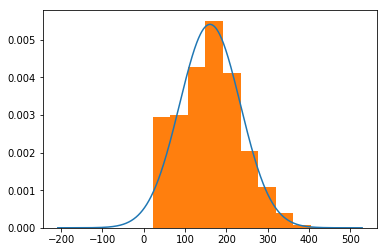

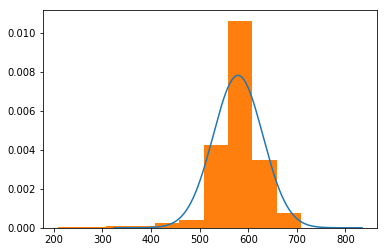

Percentiles: 281.427929, 494.958671, 388.193300
[(55, 0, 0, 0, 20, 0, 0, 0, 6)]


In [12]:

### This is the final block of code, where we run previous k-cross code with only 1 cross validation
### and only one set of params (95%) which we agreed on.
### will give us the confusion matrix to test our algo that has fixed 

def sample_k_foldrs(labels, k=5):
    # print(labels)
    from sklearn.model_selection import StratifiedKFold
    
    y = labels
    X = y
    
    skf = StratifiedKFold(n_splits=k, random_state=None, shuffle=True)
    result = skf.split(X, y)
    to_return = []
    for train_index, test_index in result:
        # print("TRAIN:", train_index, "TEST:", test_index)
        to_return.append([train_index, test_index])


    return to_return


def get_thres_one(imgs, labels, train_set, params_each):
    # print("running get_thres_one")

    
    r = 12
    R = 0.10

    # snow and no snow: get 2 lists of sums, use params to return list of thres one

    list_no_snow = []
    list_snow =[]

    for ind in train_set: 
        n = 10
        
        img = imgs[ind]

        # r is radius, R is proportion of nbds to ignore
        x, y = img.shape[0], img.shape[1]

    
        while n > 0:
            
            
            s_x, s_y = ranSelect(x-1,y-1)
            if s_x < r or s_y < r or s_x > x -1 - r or s_y > y - 1 - r:
                continue # resample if near edges
        
            color = img[s_x, s_y]
        
            # resample if we picked a point that's masked region
            if sum(color) == 0:
                continue
      
            nbd_img = img[s_x-r: s_x+r, s_y-r: s_y+r]
        
            colors = []
            sum_col = []
        
            for i in range(2*r):
                for j in range(2*r):
                    
                 
                    colors.append([nbd_img[i,j][0], nbd_img[i,j][1], nbd_img[i,j][2]])
                    sum_col.append(sum(nbd_img[i,j]))
    
            # drop top R % of highest sums
            sum_col.sort(reverse= True)
        
            while len(sum_col) > 0 and sum_col[-1] == 0:
                
            
                # remove the all zero elements
                sum_col.pop(len(sum_col)-1)
             
        
            # if there is a huge difference between max and min   
            # then remove top R percent from what is left in sum_col
        
            remove_top = int(len(sum_col)/(1/R))
            sum_col = sum_col[remove_top:]
            
        
            # append this to all_sum_col, plot hist for all imgs
            new_sum_col = np.mean(sum_col)
            if new_sum_col != 0:
                
                n -= 1
        
                if labels[ind] == 0:
                    # no snow
                    list_no_snow.append(new_sum_col)
                elif labels[ind] == 1:
                    
                    
                    list_snow.append(new_sum_col)
                    

    mu_no_snow =  np.mean(list_no_snow)
    sigma_no_snow = np.std(list_no_snow)
    
    
    
    mu_snow =  np.mean(list_snow)
    sigma_snow = np.std(list_snow)

    x = np.linspace(mu_no_snow - 5*sigma_no_snow, mu_no_snow + 5*sigma_no_snow, 1000)
    plt.plot(x,stats.norm.pdf(x, mu_no_snow, sigma_no_snow))
    plt.hist(list_no_snow, density=True)
    plt.show()
        
    x = np.linspace(mu_snow - 5*sigma_snow, mu_snow + 5*sigma_snow, 1000)
    plt.plot(x,stats.norm.pdf(x, mu_snow, sigma_snow))
    plt.hist(list_snow, density=True)
    plt.show()

    thres1 = []

    # now we have the 2 arrays, test the params
    for param in params_each:

        
        percentiles_lower = stats.norm.ppf(param, loc=mu_no_snow, scale=sigma_no_snow)
        percentages_upper = stats.norm.ppf(1-param, loc=mu_snow, scale=sigma_snow)

        thres = np.mean((percentiles_lower, percentages_upper))
        thres1.append(thres)
        print("Percentiles: %f, %f, %f" %(percentiles_lower,percentages_upper,thres))
        


    return thres1 # list of thres for each param



def compute_ratio_nbd_with_thres(img, thres1, n = 100, r = 12, R = 0.10):
    # r is radius, R is proportion of nbds to ignore
    x, y = img.shape[0], img.shape[1]
    snow = 0
    no_snow = 0

    
    while n > 0:
        s_x, s_y = ranSelect(x-1,y-1)
        if s_x < r or s_y < r or s_x > x -1 - r or s_y > y - 1 - r:
            continue # resample if near edges
        
        color = img[s_x, s_y]
        
        # resample if we picked a point that's masked region
        if sum(color) == 0:
            continue
      
        nbd_img = img[s_x-r: s_x+r, s_y-r: s_y+r]
        
        colors = []
        sum_col = []
        
        for i in range(2*r):
            for j in range(2*r):
    
                colors.append([nbd_img[i,j][0], nbd_img[i,j][1], nbd_img[i,j][2]])
                sum_col.append(sum(nbd_img[i,j]))
                
    
        # drop top R % of highest sums
        sum_col.sort(reverse= True)
        
        while len(sum_col) > 0 and sum_col[-1] == 0:
            
            # remove the all zero elements
            sum_col.pop(len(sum_col)-1)
        
        # if there is a huge difference between max and min   
        # then remove top R percent from what is left in sum_col
        
        remove_top = int(len(sum_col)/(1/R))
        sum_col = sum_col[remove_top:]
        
        # append this to all_sum_col, plot hist for all imgs
        new_sum_col = np.mean(sum_col)


        n -= 1
        
        if new_sum_col >= thres1:
            
            snow+=1
        else:
            no_snow+=1 
            
                      
    ## ratio is num of 1/ num of 0
    
    if no_snow == 0 :
        return 1

    return snow/(snow+ no_snow)



def compute_ratio_array(img_array, label_array, train_set, thres1):
    ratio_array = []
    
    
    for each_thres in thres1:
        ratio_array_no_snow = []
        ratio_array_snow = []
        for ind in train_set :
            img = img_array[ind]
            ratio= compute_ratio_nbd_with_thres(img, each_thres)
            if label_array[ind] == 0:
                ratio_array_no_snow.append(ratio)
            elif label_array[ind] == 1:
                ratio_array_snow.append(ratio)
                
        ratio_array.append([ratio_array_no_snow , ratio_array_snow])
    print(ratio_array)
    return ratio_array


def get_thres_two( ratio_array, params_each):
    thres2 = []
    for each_thres1_ratio_array in ratio_array:
        mu_no_snow =  np.mean(each_thres1_ratio_array[0])
        sigma_no_snow = np.std(each_thres1_ratio_array[0])
    
        mu_snow =  np.mean(each_thres1_ratio_array[1])
        sigma_snow = np.std(each_thres1_ratio_array[1])

        x = np.linspace(mu_no_snow - 5*sigma_no_snow, mu_no_snow + 5*sigma_no_snow, 1000)
        plt.plot(x,stats.norm.pdf(x, mu_no_snow, sigma_no_snow))
        plt.hist(each_thres1_ratio_array[0], density=True)
        plt.show()
            
        x = np.linspace(mu_snow - 5*sigma_snow, mu_snow + 5*sigma_snow, 1000)
        plt.plot(x,stats.norm.pdf(x, mu_snow, sigma_snow))
        plt.hist(each_thres1_ratio_array[1], density=True)
        plt.show()
        
        for param in params_each:
    
            
            percentiles_lower = stats.norm.ppf(param, loc=mu_no_snow, scale=sigma_no_snow)
            percentages_upper = stats.norm.ppf(1-param, loc=mu_snow, scale=sigma_snow)
    
            thres = np.mean((percentiles_lower, percentages_upper))
            thres2.append(thres)
            print("Percentiles: %f, %f, %f" %(percentiles_lower,percentages_upper,thres))
    
                    
    print(thres2)
    return thres2
    

    

    
        
    
     


def train_k_fold(train_set, img_array, label_array, name_array):
    # params_each = [0.99, 0.95, 0.90, 0.85]
    params_each = [0.95]
   
    
    
    # get nbr for train imgs, get all colors and 
    thres = []
    
    
    thres1 = get_thres_one(img_array, label_array, train_set, params_each)
    #ratio_array = compute_ratio_array(img_array, label_array, train_set, thres1)
    #thres2 = get_thres_two(ratio_array, params_each)
     

    return thres1 # tuple of arrays
    #return ratio_array
    
    
def predict_class(img, each_par):
    clas = 2
    ratio = compute_ratio_nbd_with_thres(img, each_par)
    if ratio <= 0.1:
        clas = 0
    elif ratio >= 0.9:
        clas = 1
    
    return clas
    
    
def test_k_fold(test, img_array, label_array, name_array, params):
    errors = []
    for each_par in params:
        count_0_0 = 0
        count_0_1 = 0
        count_0_2 = 0
        count_1_0 = 0
        count_1_1 = 0
        count_1_2 = 0
        count_2_0 = 0
        count_2_1 = 0
        count_2_2 = 0
        

        for ind in test:
            img = img_array[ind]
            pred_label = predict_class(img, each_par)
            if pred_label == 0 and label_array[ind] == 0:
                count_0_0 +=1
#                 print("false positive: %s"% name_array)
#                 plt.imshow(img)
#                 plt.show()

            elif pred_label == 0 and label_array[ind] == 1:
                count_0_1 +=1

            elif pred_label == 0 and label_array[ind] == 2:
                count_0_2 +=1
            elif pred_label == 1 and label_array[ind] == 0:
                count_1_0 +=1
            elif pred_label == 1 and label_array[ind] == 1:
                count_1_1 +=1
            elif pred_label == 1 and label_array[ind] == 2:
                count_1_2 +=1
            elif pred_label == 2 and label_array[ind] == 0:
                count_2_0 +=1
            elif pred_label == 2 and label_array[ind] == 1:
                count_2_1 +=1
            elif pred_label == 2 and label_array[ind] == 2:
                count_2_2 +=1
                
            
        errors.append((count_0_0 ,count_0_1 ,count_0_2 ,count_1_0 ,count_1_1 ,count_1_2 ,count_2_0 ,count_2_1 ,count_2_2 ))
    print(errors)
    return errors

def divide_all_k_fold():
    
    

    k_foldrs = ["all_k_fold/all_no_snow/", "all_k_fold/all_snow/", "all_k_fold/all_partial/"]
    
    img_array = [] # all actual img objects
    label_array = [] # 0: no 1: snow 2: partial
    name_array = [] # their names!

    size_no_snow = 0
    size_snow = 0
    size_partial = 0



    for foldr in k_foldrs:
        
        # read in raw_images
        for filename in os.listdir(foldr):
            
            img = cv.imread(os.path.join(foldr,filename))
            if img is not None:

                cropped_image= img[230:600,1100:1600]
                masked_image = mask_panel(cropped_image)

                img_array.append(masked_image)
                name_array.append(filename)

                if foldr == "all_k_fold/all_no_snow/":
                    label_array.append(0)
                    size_no_snow += 1

                elif foldr == "all_k_fold/all_snow/":
                    label_array.append(1)
                    size_snow += 1
                else:
                    label_array.append(2)
                    size_partial +=1

    sizes = [size_snow, size_snow, size_partial]
                
    # now we have three arrays 
    # need to divide them! 
    k_fold_sets = sample_k_foldrs(label_array)
    
    # should be array of size k
    
    return (k_fold_sets, img_array, label_array, name_array)
    

    #col_thres, ratio1, ratio2 = train_k_fold(training_set)
    #errors = test_set(test_set, col_thres, ratio1, ratio2)
    
k_fold_sets, img_array, label_array, name_array = divide_all_k_fold()



for train, test in k_fold_sets:
        
    params = train_k_fold(train, img_array, label_array, name_array)
    
    # apply thres1 onto test set to get pred error (thre2 not applied here, use 0.1 and 0.9)
    pred_errors = test_k_fold(test, img_array, label_array, name_array, params)

    break
    
    

    



        
    

In [13]:
print(params)

[388.1932998023233]


false: 2019-03-30_11-42-38_533.jpg


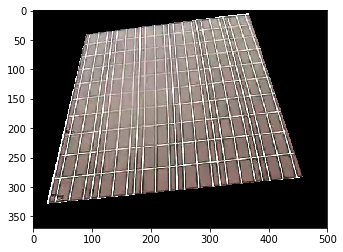

false: 2019-03-30_11-22-38_391.jpg


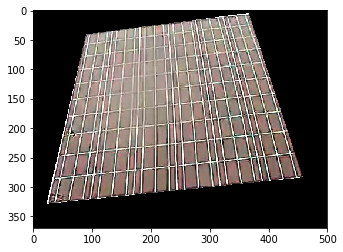

false: 2019-03-30_14-32-40_826.jpg


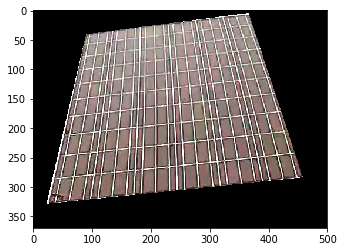

false: 2019-03-30_13-12-39_746.jpg


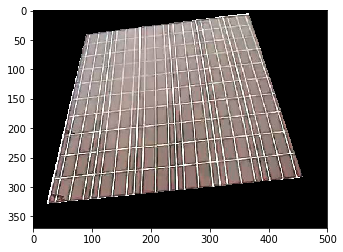

false: 2019-04-01_11-23-18_187.jpg


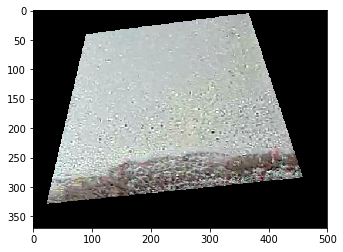

false: 2019-04-01_11-13-18_100.jpg


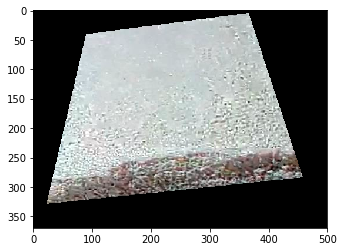

false: 2019-04-01_11-03-17_921.jpg


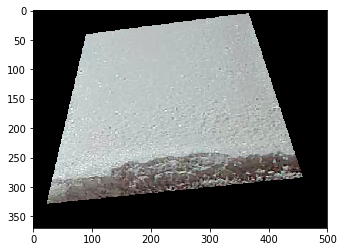

false: 2019-04-01_10-53-17_803.jpg


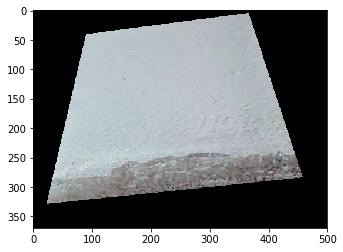

[(42, 0, 0, 0, 52, 0, 4, 4, 35)]


In [21]:

### This is testing my chosen params on new test data, getting my results confusion matrix stuff here, along with accuracy



def sample_k_foldrs(labels, k=5):
    # print(labels)
    from sklearn.model_selection import StratifiedKFold
    
    y = labels
    X = y
    
    skf = StratifiedKFold(n_splits=k, random_state=None, shuffle=True)
    result = skf.split(X, y)
    to_return = []
    for train_index, test_index in result:
        # print("TRAIN:", train_index, "TEST:", test_index)
        to_return.append([train_index, test_index])


    return to_return


def get_thres_one(imgs, labels, train_set, params_each):
    # print("running get_thres_one")

    
    r = 12
    R = 0.10

    # snow and no snow: get 2 lists of sums, use params to return list of thres one

    list_no_snow = []
    list_snow =[]

    for ind in train_set: 
        n = 10
        
        img = imgs[ind]

        # r is radius, R is proportion of nbds to ignore
        x, y = img.shape[0], img.shape[1]

    
        while n > 0:
            
            
            s_x, s_y = ranSelect(x-1,y-1)
            if s_x < r or s_y < r or s_x > x -1 - r or s_y > y - 1 - r:
                continue # resample if near edges
        
            color = img[s_x, s_y]
        
            # resample if we picked a point that's masked region
            if sum(color) == 0:
                continue
      
            nbd_img = img[s_x-r: s_x+r, s_y-r: s_y+r]
        
            colors = []
            sum_col = []
        
            for i in range(2*r):
                for j in range(2*r):
                    
                 
                    colors.append([nbd_img[i,j][0], nbd_img[i,j][1], nbd_img[i,j][2]])
                    sum_col.append(sum(nbd_img[i,j]))
    
            # drop top R % of highest sums
            sum_col.sort(reverse= True)
        
            while len(sum_col) > 0 and sum_col[-1] == 0:
                
            
                # remove the all zero elements
                sum_col.pop(len(sum_col)-1)
             
        
            # if there is a huge difference between max and min   
            # then remove top R percent from what is left in sum_col
        
            remove_top = int(len(sum_col)/(1/R))
            sum_col = sum_col[remove_top:]
            
        
            # append this to all_sum_col, plot hist for all imgs
            new_sum_col = np.mean(sum_col)
            if new_sum_col != 0:
                
                n -= 1
        
                if labels[ind] == 0:
                    # no snow
                    list_no_snow.append(new_sum_col)
                elif labels[ind] == 1:
                    
                    
                    list_snow.append(new_sum_col)
                    

    mu_no_snow =  np.mean(list_no_snow)
    sigma_no_snow = np.std(list_no_snow)
    
    
    
    mu_snow =  np.mean(list_snow)
    sigma_snow = np.std(list_snow)

    x = np.linspace(mu_no_snow - 5*sigma_no_snow, mu_no_snow + 5*sigma_no_snow, 1000)
    plt.plot(x,stats.norm.pdf(x, mu_no_snow, sigma_no_snow))
    plt.hist(list_no_snow, density=True)
    plt.show()
        
    x = np.linspace(mu_snow - 5*sigma_snow, mu_snow + 5*sigma_snow, 1000)
    plt.plot(x,stats.norm.pdf(x, mu_snow, sigma_snow))
    plt.hist(list_snow, density=True)
    plt.show()

    thres1 = []

    # now we have the 2 arrays, test the params
    for param in params_each:

        
        percentiles_lower = stats.norm.ppf(param, loc=mu_no_snow, scale=sigma_no_snow)
        percentages_upper = stats.norm.ppf(1-param, loc=mu_snow, scale=sigma_snow)

        thres = np.mean((percentiles_lower, percentages_upper))
        thres1.append(thres)
        print("Percentiles: %f, %f, %f" %(percentiles_lower,percentages_upper,thres))
        


    return thres1 # list of thres for each param



def compute_ratio_nbd_with_thres(img, thres1, n = 100, r = 12, R = 0.10):
    # r is radius, R is proportion of nbds to ignore
    x, y = img.shape[0], img.shape[1]
    snow = 0
    no_snow = 0

    
    while n > 0:
        s_x, s_y = ranSelect(x-1,y-1)
        if s_x < r or s_y < r or s_x > x -1 - r or s_y > y - 1 - r:
            continue # resample if near edges
        
        color = img[s_x, s_y]
        
        # resample if we picked a point that's masked region
        if sum(color) == 0:
            continue
      
        nbd_img = img[s_x-r: s_x+r, s_y-r: s_y+r]
        
        colors = []
        sum_col = []
        
        for i in range(2*r):
            for j in range(2*r):
    
                colors.append([nbd_img[i,j][0], nbd_img[i,j][1], nbd_img[i,j][2]])
                sum_col.append(sum(nbd_img[i,j]))
                
    
        # drop top R % of highest sums
        sum_col.sort(reverse= True)
        
        while len(sum_col) > 0 and sum_col[-1] == 0:
            
            # remove the all zero elements
            sum_col.pop(len(sum_col)-1)
        
        # if there is a huge difference between max and min   
        # then remove top R percent from what is left in sum_col
        
        remove_top = int(len(sum_col)/(1/R))
        sum_col = sum_col[remove_top:]
        
        # append this to all_sum_col, plot hist for all imgs
        new_sum_col = np.mean(sum_col)


        n -= 1
        
        if new_sum_col >= thres1:
            
            snow+=1
        else:
            no_snow+=1 
            
                      
    ## ratio is num of 1/ num of 0
    
    if no_snow == 0 :
        return 1

    return snow/(snow+ no_snow)



def compute_ratio_array(img_array, label_array, train_set, thres1):
    ratio_array = []
    
    
    for each_thres in thres1:
        ratio_array_no_snow = []
        ratio_array_snow = []
        for ind in train_set :
            img = img_array[ind]
            ratio= compute_ratio_nbd_with_thres(img, each_thres)
            if label_array[ind] == 0:
                ratio_array_no_snow.append(ratio)
            elif label_array[ind] == 1:
                ratio_array_snow.append(ratio)
                
        ratio_array.append([ratio_array_no_snow , ratio_array_snow])
    print(ratio_array)
    return ratio_array


def get_thres_two( ratio_array, params_each):
    thres2 = []
    for each_thres1_ratio_array in ratio_array:
        mu_no_snow =  np.mean(each_thres1_ratio_array[0])
        sigma_no_snow = np.std(each_thres1_ratio_array[0])
    
        mu_snow =  np.mean(each_thres1_ratio_array[1])
        sigma_snow = np.std(each_thres1_ratio_array[1])

        x = np.linspace(mu_no_snow - 5*sigma_no_snow, mu_no_snow + 5*sigma_no_snow, 1000)
        plt.plot(x,stats.norm.pdf(x, mu_no_snow, sigma_no_snow))
        plt.hist(each_thres1_ratio_array[0], density=True)
        plt.show()
            
        x = np.linspace(mu_snow - 5*sigma_snow, mu_snow + 5*sigma_snow, 1000)
        plt.plot(x,stats.norm.pdf(x, mu_snow, sigma_snow))
        plt.hist(each_thres1_ratio_array[1], density=True)
        plt.show()
        
        for param in params_each:
    
            
            percentiles_lower = stats.norm.ppf(param, loc=mu_no_snow, scale=sigma_no_snow)
            percentages_upper = stats.norm.ppf(1-param, loc=mu_snow, scale=sigma_snow)
    
            thres = np.mean((percentiles_lower, percentages_upper))
            thres2.append(thres)
            print("Percentiles: %f, %f, %f" %(percentiles_lower,percentages_upper,thres))
    
                    
    print(thres2)
    return thres2
    

    

    
        
    
     


def train_k_fold(train_set, img_array, label_array, name_array):
    # params_each = [0.99, 0.95, 0.90, 0.85]
    params_each = [0.95]
   
    
    
    # get nbr for train imgs, get all colors and 
    thres = []
    
    
    thres1 = get_thres_one(img_array, label_array, train_set, params_each)
    #ratio_array = compute_ratio_array(img_array, label_array, train_set, thres1)
    #thres2 = get_thres_two(ratio_array, params_each)
     

    return thres1 # tuple of arrays
    #return ratio_array
    
    
def predict_class(img, each_par):
    clas = 2
    ratio = compute_ratio_nbd_with_thres(img, each_par)
    if ratio <= 0.1:
        clas = 0
    elif ratio >= 0.9:
        clas = 1
    
    return clas
    
    
def test_k_fold(test, img_array, label_array, name_array, params):
    errors = []
    for each_par in params:
        count_0_0 = 0
        count_0_1 = 0
        count_0_2 = 0
        count_1_0 = 0
        count_1_1 = 0
        count_1_2 = 0
        count_2_0 = 0
        count_2_1 = 0
        count_2_2 = 0
        

        for ind, img in enumerate(test):
            
            pred_label = predict_class(img, each_par)
            if pred_label == 0 and label_array[ind] == 0:
                count_0_0 +=1
#                 print("false positive: %s"% name_array)
#                 plt.imshow(img)
#                 plt.show()

            elif pred_label == 0 and label_array[ind] == 1:
                count_0_1 +=1
                print("false: %s"% name_array)
                plt.imshow(img)
                plt.show()

            elif pred_label == 0 and label_array[ind] == 2:
                count_0_2 +=1
                print("false: %s"% name_array[ind])
                plt.imshow(img)
                plt.show()
            elif pred_label == 1 and label_array[ind] == 0:
                count_1_0 +=1
                print("false: %s"% name_array[ind])
                plt.imshow(img)
                plt.show()
            elif pred_label == 1 and label_array[ind] == 1:
                count_1_1 +=1
            elif pred_label == 1 and label_array[ind] == 2:
                count_1_2 +=1
                print("false: %s"% name_array[ind])
                plt.imshow(img)
                plt.show()
            elif pred_label == 2 and label_array[ind] == 0:
                count_2_0 +=1
                print("false: %s"% name_array[ind])
                plt.imshow(img)
                plt.show()
            elif pred_label == 2 and label_array[ind] == 1:
                count_2_1 +=1
                print("false: %s"% name_array[ind])
                plt.imshow(img)
                plt.show()
            elif pred_label == 2 and label_array[ind] == 2:
                count_2_2 +=1
                
            
        errors.append((count_0_0 ,count_0_1 ,count_0_2 ,count_1_0 ,count_1_1 ,count_1_2 ,count_2_0 ,count_2_1 ,count_2_2 ))
    print(errors)
    return errors

def divide_all_just_test():
    
    

    k_foldrs = ["test_raw_no_snow/", "test_raw_snow/", "test_partial/"]
    
    img_array = [] # all actual img objects
    label_array = [] # 0: no 1: snow 2: partial
    name_array = [] # their names!

    size_no_snow = 0
    size_snow = 0
    size_partial = 0



    for foldr in k_foldrs:
        
        # read in raw_images
        for filename in os.listdir(foldr):
            
            img = cv.imread(os.path.join(foldr,filename))
            if img is not None:

                cropped_image= img[230:600,1100:1600]
                masked_image = mask_panel(cropped_image)

                img_array.append(masked_image)
                name_array.append(filename)

                if foldr == "test_raw_no_snow/":
                    label_array.append(0)
                    size_no_snow += 1

                elif foldr == "test_raw_snow/":
                    label_array.append(1)
                    size_snow += 1
                else:
                    label_array.append(2)
                    size_partial +=1

    sizes = [size_snow, size_snow, size_partial]
                
    # # now we have three arrays 
    # # need to divide them! 
    # k_fold_sets = sample_k_foldrs(label_array)
    
    # should be array of size k
    
    return (img_array, label_array, name_array)
    

   
    
#img_array, label_array, name_array = divide_all_just_test()





pred_errors = test_k_fold(img_array, img_array, label_array, name_array, [388])
    
    

    



        


[42, 0, 0, 0, 54, 0, 4, 2, 35]
[42, 0, 0, 0, 53, 0, 4, 3, 35]
[42, 0, 0, 0, 53, 0, 4, 3, 35]
[42, 0, 0, 0, 53, 0, 4, 3, 35]
[42, 0, 0, 0, 53, 0, 4, 3, 35]
[42, 0, 0, 0, 53, 0, 4, 3, 35]
[42, 0, 0, 0, 53, 0, 4, 3, 35]
[42, 0, 0, 0, 52, 0, 4, 4, 35]
[42, 0, 0, 0, 54, 0, 4, 2, 35]
[42, 0, 0, 0, 52, 0, 4, 4, 35]
[42, 0, 0, 0, 54, 0, 4, 2, 35]
[42, 0, 0, 0, 51, 0, 4, 5, 35]
[42, 0, 0, 0, 52, 0, 4, 4, 35]
[42, 0, 0, 0, 55, 0, 4, 1, 35]
[42, 0, 0, 0, 52, 0, 4, 4, 35]
[42, 0, 0, 0, 52, 0, 4, 4, 35]
[42, 0, 0, 0, 52, 0, 4, 4, 35]
[42, 0, 0, 0, 52, 0, 4, 4, 35]
[42, 0, 0, 0, 53, 0, 4, 3, 35]
[42, 0, 0, 0, 53, 0, 4, 3, 35]
[42, 0, 0, 0, 53, 0, 4, 3, 35]
[42, 0, 0, 0, 52, 0, 4, 4, 35]
[42, 0, 0, 0, 51, 0, 4, 5, 35]
[42, 0, 0, 0, 52, 0, 4, 4, 35]
[42, 0, 0, 0, 52, 0, 4, 4, 35]


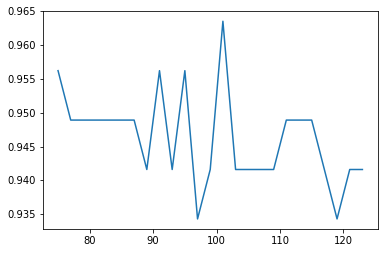

[42, 0, 0, 0, 54, 0, 4, 2, 35]
[42, 0, 0, 0, 52, 0, 4, 4, 35]
[42, 0, 0, 0, 54, 0, 4, 2, 35]
[42, 0, 0, 0, 53, 0, 4, 3, 35]
[42, 0, 0, 0, 53, 0, 4, 3, 35]
[42, 0, 0, 0, 51, 0, 4, 5, 35]
[42, 0, 0, 0, 52, 0, 4, 4, 35]
[42, 0, 0, 0, 53, 0, 4, 3, 35]
[42, 0, 0, 0, 52, 0, 4, 4, 35]
[42, 0, 0, 0, 54, 0, 4, 2, 35]


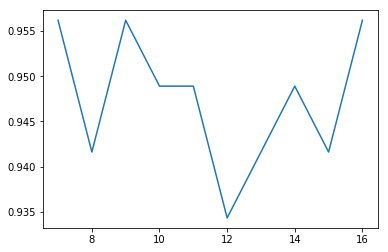

[42, 0, 0, 0, 53, 0, 4, 3, 35]
[42, 0, 0, 0, 55, 0, 4, 1, 35]
[42, 0, 0, 0, 53, 0, 4, 3, 35]
[42, 0, 0, 0, 52, 0, 4, 4, 35]
[42, 0, 0, 0, 52, 0, 4, 4, 35]
[42, 0, 0, 0, 52, 0, 4, 4, 35]
[42, 0, 0, 0, 53, 0, 4, 3, 35]
[42, 0, 0, 0, 52, 0, 4, 4, 35]
[42, 0, 0, 0, 51, 0, 4, 5, 35]
[42, 0, 0, 0, 53, 0, 4, 3, 35]


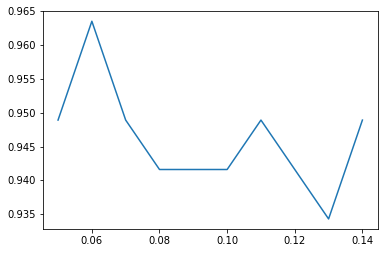

[35, 0, 0, 4, 56, 0, 7, 0, 35]
[36, 0, 0, 4, 55, 0, 6, 1, 35]
[37, 0, 0, 3, 56, 0, 6, 0, 35]
[38, 0, 0, 3, 56, 0, 5, 0, 35]
[37, 0, 0, 2, 55, 0, 7, 1, 35]
[39, 0, 0, 2, 55, 0, 5, 1, 35]
[39, 0, 0, 2, 55, 0, 5, 1, 35]
[40, 0, 0, 1, 55, 0, 5, 1, 35]
[41, 0, 0, 1, 54, 0, 4, 2, 35]
[41, 0, 0, 1, 55, 0, 4, 1, 35]
[42, 0, 0, 0, 53, 0, 4, 3, 35]
[42, 0, 0, 0, 54, 0, 4, 2, 35]
[42, 0, 0, 0, 53, 0, 4, 3, 35]
[42, 0, 0, 0, 52, 0, 4, 4, 35]
[42, 0, 0, 0, 54, 0, 4, 2, 35]
[42, 0, 0, 0, 52, 0, 4, 4, 35]
[42, 0, 0, 0, 52, 0, 4, 4, 35]
[42, 0, 0, 0, 53, 0, 4, 3, 35]
[42, 0, 0, 0, 52, 0, 4, 4, 35]
[42, 0, 0, 0, 52, 0, 4, 4, 35]
[42, 0, 0, 0, 52, 0, 4, 4, 35]
[42, 0, 0, 0, 51, 0, 4, 5, 35]
[42, 0, 0, 0, 52, 0, 4, 4, 35]
[42, 0, 0, 0, 51, 0, 4, 5, 35]
[42, 0, 0, 0, 51, 0, 4, 5, 35]
[42, 0, 0, 0, 52, 0, 4, 4, 35]
[42, 0, 0, 0, 51, 0, 4, 5, 35]
[42, 0, 0, 0, 51, 0, 4, 5, 35]
[42, 0, 0, 0, 50, 0, 4, 6, 35]
[43, 0, 0, 0, 51, 0, 3, 5, 35]


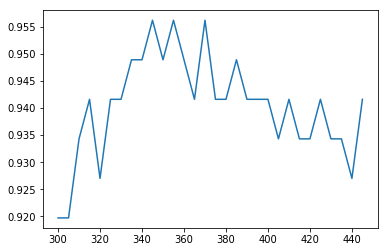

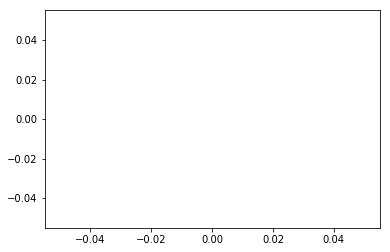

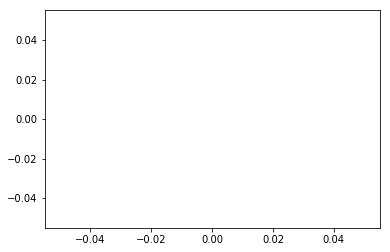

In [44]:
## This is for sensitivity analysis:

### This is the final block of code, where we run previous k-cross code with only 1 cross validation
### and only one set of params (95%) which we agreed on.
### will give us the confusion matrix to test our algo that has fixed 

def sample_k_foldrs(labels, k=5):
    # print(labels)
    from sklearn.model_selection import StratifiedKFold
    
    y = labels
    X = y
    
    skf = StratifiedKFold(n_splits=k, random_state=None, shuffle=True)
    result = skf.split(X, y)
    to_return = []
    for train_index, test_index in result:
        # print("TRAIN:", train_index, "TEST:", test_index)
        to_return.append([train_index, test_index])


    return to_return


def get_thres_one(imgs, labels, train_set, params_each):
    # print("running get_thres_one")

    
    r = 12
    R = 0.10

    # snow and no snow: get 2 lists of sums, use params to return list of thres one

    list_no_snow = []
    list_snow =[]

    for ind in train_set: 
        n = 10
        
        img = imgs[ind]

        # r is radius, R is proportion of nbds to ignore
        x, y = img.shape[0], img.shape[1]

    
        while n > 0:
            
            
            s_x, s_y = ranSelect(x-1,y-1)
            if s_x < r or s_y < r or s_x > x -1 - r or s_y > y - 1 - r:
                continue # resample if near edges
        
            color = img[s_x, s_y]
        
            # resample if we picked a point that's masked region
            if sum(color) == 0:
                continue
      
            nbd_img = img[s_x-r: s_x+r, s_y-r: s_y+r]
        
            colors = []
            sum_col = []
        
            for i in range(2*r):
                for j in range(2*r):
                    
                 
                    colors.append([nbd_img[i,j][0], nbd_img[i,j][1], nbd_img[i,j][2]])
                    sum_col.append(sum(nbd_img[i,j]))
    
            # drop top R % of highest sums
            sum_col.sort(reverse= True)
        
            while len(sum_col) > 0 and sum_col[-1] == 0:
                
            
                # remove the all zero elements
                sum_col.pop(len(sum_col)-1)
             
        
            # if there is a huge difference between max and min   
            # then remove top R percent from what is left in sum_col
        
            remove_top = int(len(sum_col)/(1/R))
            sum_col = sum_col[remove_top:]
            
        
            # append this to all_sum_col, plot hist for all imgs
            new_sum_col = np.mean(sum_col)
            if new_sum_col != 0:
                
                n -= 1
        
                if labels[ind] == 0:
                    # no snow
                    list_no_snow.append(new_sum_col)
                elif labels[ind] == 1:
                    
                    
                    list_snow.append(new_sum_col)
                    

    mu_no_snow =  np.mean(list_no_snow)
    sigma_no_snow = np.std(list_no_snow)
    
    
    
    mu_snow =  np.mean(list_snow)
    sigma_snow = np.std(list_snow)

    x = np.linspace(mu_no_snow - 5*sigma_no_snow, mu_no_snow + 5*sigma_no_snow, 1000)
    plt.plot(x,stats.norm.pdf(x, mu_no_snow, sigma_no_snow))
    plt.hist(list_no_snow, density=True)
    plt.show()
        
    x = np.linspace(mu_snow - 5*sigma_snow, mu_snow + 5*sigma_snow, 1000)
    plt.plot(x,stats.norm.pdf(x, mu_snow, sigma_snow))
    plt.hist(list_snow, density=True)
    plt.show()

    thres1 = []

    # now we have the 2 arrays, test the params
    for param in params_each:

        
        percentiles_lower = stats.norm.ppf(param, loc=mu_no_snow, scale=sigma_no_snow)
        percentages_upper = stats.norm.ppf(1-param, loc=mu_snow, scale=sigma_snow)

        thres = np.mean((percentiles_lower, percentages_upper))
        thres1.append(thres)
        print("Percentiles: %f, %f, %f" %(percentiles_lower,percentages_upper,thres))
        


    return thres1 # list of thres for each param



def compute_ratio_nbd_with_thres(img, all_params):
    n = all_params[0]
    r = all_params[1]
    R = all_params[2]
    thres1 = all_params[3]



    # r is radius, R is proportion of nbds to ignore
    x, y = img.shape[0], img.shape[1]
    snow = 0
    no_snow = 0

    
    while n > 0:
        s_x, s_y = ranSelect(x-1,y-1)
        if s_x < r or s_y < r or s_x > x -1 - r or s_y > y - 1 - r:
            continue # resample if near edges
        
        color = img[s_x, s_y]
        
        # resample if we picked a point that's masked region
        if sum(color) == 0:
            continue
      
        nbd_img = img[s_x-r: s_x+r, s_y-r: s_y+r]
        
        colors = []
        sum_col = []
        
        for i in range(2*r):
            for j in range(2*r):
    
                colors.append([nbd_img[i,j][0], nbd_img[i,j][1], nbd_img[i,j][2]])
                sum_col.append(sum(nbd_img[i,j]))
                
    
        # drop top R % of highest sums
        sum_col.sort(reverse= True)
        
        while len(sum_col) > 0 and sum_col[-1] == 0:
            
            # remove the all zero elements
            sum_col.pop(len(sum_col)-1)
        
        # if there is a huge difference between max and min   
        # then remove top R percent from what is left in sum_col
        
        remove_top = int(len(sum_col)/(1/R))
        sum_col = sum_col[remove_top:]
        
        # append this to all_sum_col, plot hist for all imgs
        new_sum_col = np.mean(sum_col)


        n -= 1
        
        if new_sum_col >= thres1:
            
            snow+=1
        else:
            no_snow+=1 
            
                      
    ## ratio is num of 1/ num of 0
    
    if no_snow == 0 :
        return 1

    return snow/(snow+ no_snow)


        
    
     


def train_k_fold(train_set, img_array, label_array, name_array):
    # params_each = [0.99, 0.95, 0.90, 0.85]
    params_each = [0.95]
   
    
    
    # get nbr for train imgs, get all colors and 
    thres = []
    
    
    thres1 = get_thres_one(img_array, label_array, train_set, params_each)
    

    return thres1 # tuple of arrays
    #return ratio_array
    
    
def predict_class(img, all_params):
    l_min = all_params[4]
    l_max = all_params[5]

    clas = 2
    ratio = compute_ratio_nbd_with_thres(img, all_params)
    if ratio <= l_min:
        clas = 0
    elif ratio >= l_max:
        clas = 1
    
    return clas
    
    
def test_k_fold( img_array, label_array, name_array, all_params):
    errors = []
    
    count_0_0 = 0
    count_0_1 = 0
    count_0_2 = 0
    count_1_0 = 0
    count_1_1 = 0
    count_1_2 = 0
    count_2_0 = 0
    count_2_1 = 0
    count_2_2 = 0 
    for ind, img in enumerate(img_array):     
        pred_label = predict_class(img, all_params)
        if pred_label == 0 and label_array[ind] == 0:
            count_0_0 +=1
#             print("false positive: %s"% name_array)
#             plt.imshow(img)
#             plt.show()
        elif pred_label == 0 and label_array[ind] == 1:
            count_0_1 +=1
        elif pred_label == 0 and label_array[ind] == 2:
            count_0_2 +=1
        elif pred_label == 1 and label_array[ind] == 0:
            count_1_0 +=1
        elif pred_label == 1 and label_array[ind] == 1:
            count_1_1 +=1
        elif pred_label == 1 and label_array[ind] == 2:
            count_1_2 +=1
        elif pred_label == 2 and label_array[ind] == 0:
            count_2_0 +=1
        elif pred_label == 2 and label_array[ind] == 1:
            count_2_1 +=1
        elif pred_label == 2 and label_array[ind] == 2:
            count_2_2 +=1
                
    errors = [count_0_0 ,count_0_1 ,count_0_2 ,count_1_0 ,count_1_1 ,count_1_2 ,count_2_0 ,count_2_1 ,count_2_2]        
    #errors.append((count_0_0 ,count_0_1 ,count_0_2 ,count_1_0 ,count_1_1 ,count_1_2 ,count_2_0 ,count_2_1 ,count_2_2 ))
    print(errors)
    return errors

def divide_all_just_test():
    
    

    k_foldrs = ["test_raw_no_snow/", "test_raw_snow/", "test_partial/"]
    
    img_array = [] # all actual img objects
    label_array = [] # 0: no 1: snow 2: partial
    name_array = [] # their names!

    size_no_snow = 0
    size_snow = 0
    size_partial = 0



    for foldr in k_foldrs:
        
        # read in raw_images
        for filename in os.listdir(foldr):
            
            img = cv.imread(os.path.join(foldr,filename))
            if img is not None:

                cropped_image= img[230:600,1100:1600]
                masked_image = mask_panel(cropped_image)

                img_array.append(masked_image)
                name_array.append(filename)

                if foldr == "test_raw_no_snow/":
                    label_array.append(0)
                    size_no_snow += 1

                elif foldr == "test_raw_snow/":
                    label_array.append(1)
                    size_snow += 1
                else:
                    label_array.append(2)
                    size_partial +=1

    sizes = [size_snow, size_snow, size_partial]
                
    
    return (img_array, label_array, name_array)
    

    
img_array, label_array, name_array = divide_all_just_test()



fixed_values = [100, 12, 0.1, 388, 0.1, 0.9]


x = [range(75,125,2), range(7,17), np.arange(0.05, 0.15, 0.01) , range(300, 450, 5), np.arange(0.05, 0.020, 0.01), np.arange(0.85, 0.1, 0.01)]
for i in range(6):
    
    accuracies =[]
    for each_par in x[i]:
        
        all_params = fixed_values.copy()
        all_params[i] = each_par
        pred_errors = test_k_fold( img_array, label_array, name_array,all_params)
    
        accuracies.append( (pred_errors[0] + pred_errors[4] + pred_errors[-1])/sum(pred_errors))
        
    plt.plot(x[i],accuracies)
    plot_name = "Sensitivity_" + str(i) + ".png"
    plt.savefig(plot_name)
    plt.show()
    
    



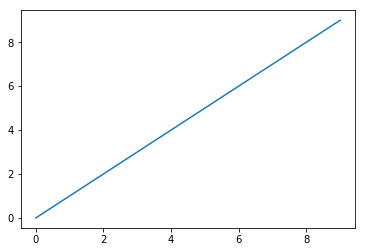

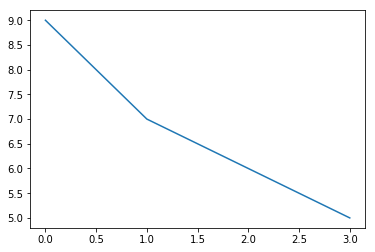

In [43]:
import matplotlib.pyplot as plt

plt.plot(range(10))
plt.savefig('testplot.png')
plt.show()

i = 0
plt.plot([0,1,3],[9,7,5])
plot_name = "Sensitivity_" + str(i) + ".png"
plt.savefig(plot_name)
plt.show()
